In [2]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import collections
from collections import Counter
from statistics import mean #per la media

from grafici import htlc_distribution, feebase_distribution, feerate_distribution, double_hist_fee

In [3]:
#leggo il grafo dal file .gml 
#ln = nx.read_gml('output\grafi\grafodef.gml')

ln = nx.read_gml('output\grafi\multigrafo.gml')

In [4]:
numnodi = ln.number_of_nodes()
numarchi = ln.number_of_edges()

print(numnodi)
print(numarchi)

11044
42974


# ***ANALISI DISTRIBUZIONI FEE***

### *Def:*
### **min_htcl:** *valore minimo (espresso in msat) per cui un nodo è disposto a fare il forward di un pagamento*
### **fee_base:**  *tariffa fissa (espressa in mSat) addebitata su ogni transazione instradata attraverso un certo nodo*
### **fee_rate:** : *millisatoshi aggiuntivi richiesti per ogni milione di satoshi inviati*



In [4]:
#per calcolare le distribuzioni

htlc1 = [int(c) for (u, v, c) in ln.edges.data('MINHTLC1') ]
htlc2 = [int(c) for (u, v, c) in ln.edges.data('MINHTLC2')]
htlc = htlc1+htlc2 
feebase1 = [c for (u, v, c) in ln.edges.data('FEEBASE1')]
feebase2 = [c for (u, v, c) in ln.edges.data('FEEBASE2')]
feebase = feebase1 + feebase2
feerate1 = [int(c) for (u, v, c) in ln.edges.data('FEERATE1')]
feerate2 = [int(c) for (u, v, c) in ln.edges.data('FEERATE2')]
feerate = feerate1 + feerate2

In [7]:
htlccounter = collections.Counter(htlc)
feebasecounter = collections.Counter(feebase)
fee2 = collections.Counter(feerate2)
feeratecounter = collections.Counter(feerate)

### **HTLC**

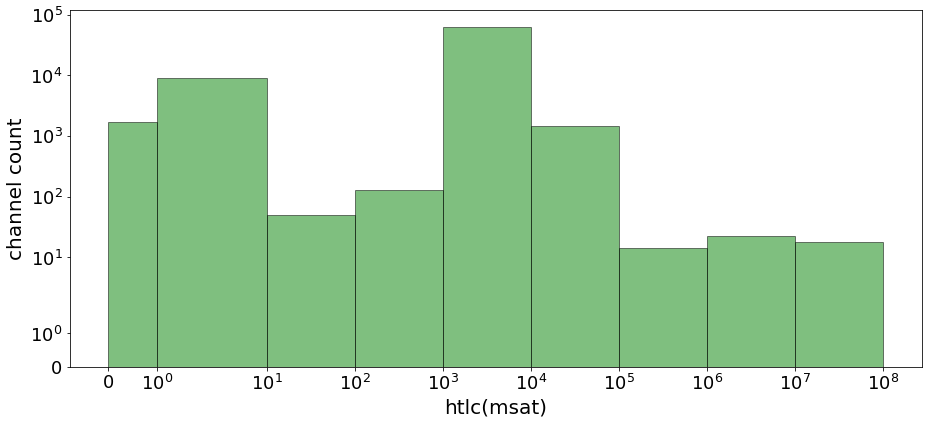

In [5]:
#calcolo istogramma della distrubuzione dei valori di htlc
htlc_distribution(htlc)
#plt.savefig('output\immg\htlc.png')

In [8]:
#percentuali htlc nei canali 

zero = 0
uno = 0
dieci = 0
cento = 0
mille = 0
centok = 0
milione = 0
dieciM = 0
centoM = 0


for key in htlccounter.keys():
    #if int(key) <= 0 :
    #    zero += htclcounter[key]
    if int(key) <= 1 and int(key) >= 0:
        uno += htlccounter[key]
    if int(key) <= 10 :
        dieci += htlccounter[key]
    if int(key) <= 100 :
        cento += htlccounter[key]
    if int(key) == 1000 :
        mille += htlccounter[key]
#   if int(key) <= 10000 :
#       diecimila += htclcounter[key]
    if int(key) <= 100000 :
        centok += htlccounter[key]
    if int(key) <= 1000000 :
        milione+= htlccounter[key]
    if int(key) <= 10000000 :
        dieciM+= htlccounter[key] 
    if int(key) <= 100000000 :
        centoM+= htlccounter[key]
        
print("La percentuale di canali con minhtlc <= 1 è ", str(round(uno*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 10 è ", str(round(dieci*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 100 è ", str(round(cento*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 1000 è ", str(round(mille*100/len(htlc),3)), "%")
#print("La percentuale di canali con minhtcl <= 10000 è ", str(round(diecimila*100/len(htcl1),3)), "%")
print("La percentuale di canali con minhtlc <= 100000 è ", str(round(centok*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 1000000 è ", str(round(milione*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 10000000 è ", str(round(dieciM*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 100000000 è ", str(round(centoM*100/len(htlc),3)), "%")


La percentuale di canali con minhtlc <= 1 è  12.359 %
La percentuale di canali con minhtlc <= 10 è  25.574 %
La percentuale di canali con minhtlc <= 100 è  25.723 %
La percentuale di canali con minhtlc <= 1000 è  72.424 %
La percentuale di canali con minhtlc <= 100000 è  99.948 %
La percentuale di canali con minhtlc <= 1000000 è  99.979 %
La percentuale di canali con minhtlc <= 10000000 è  99.994 %
La percentuale di canali con minhtlc <= 100000000 è  100.0 %


### **FEE_BASE**

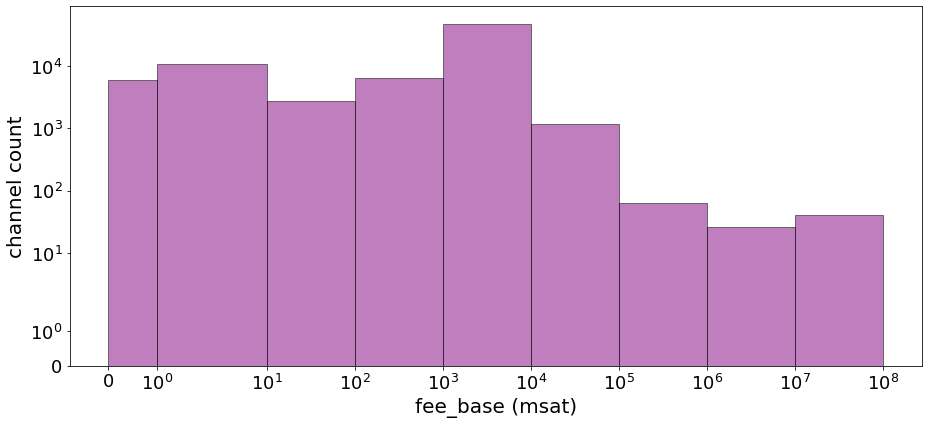

In [13]:
feebase_distribution(feebase)
#plt.savefig('feebase.png')


In [14]:
uno = 0
dieci = 0
cento = 0
mille = 0
diecik = 0
centok = 0
milione = 0
dieciM = 0
centoM = 0
miliardo = 0

for key in feebasecounter.keys():
    if int(key) <= 1 :
        uno += feebasecounter[key]
    if int(key) <= 10 :
        dieci += feebasecounter[key]
    if int(key) <= 100 :
        cento += feebasecounter[key]
    if int(key) <= 1000 :
        mille += feebasecounter[key]
    if int(key) <= 100000 :
        centok += feebasecounter[key]
    if int(key) <= 1000000 :
        milione += feebasecounter[key]
    if int(key) <= 10000000 :
        dieciM += feebasecounter[key]
    if int(key) <= 100000000:
        centoM += feebasecounter[key]
    if int(key) <= 1000000000 :
        miliardo += feebasecounter[key]
        
        
print("La percentuale di canali con feebase <= 1 è ", str(round(uno*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 10 è ", str(round(dieci*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 100 è ", str(round(cento*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 1000 è ", str(round(mille*100/len(feebase),3)), "%")
#print("La percentuale di canali con feebase <= 10000 è ", str(round(diecimila*100/len(feerate),3)), "%")
print("La percentuale di canali con feebase <= 100000 è ", str(round(centok*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 1000000 è ", str(round(milione*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 10000000 è ", str(round(dieciM*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 100000000 è ", str(round(centoM*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 1000000000 è ", str(round(miliardo*100/len(feebase),3)), "%")

La percentuale di canali con feebase <= 1 è  31.271 %
La percentuale di canali con feebase <= 10 è  33.538 %
La percentuale di canali con feebase <= 100 è  37.188 %
La percentuale di canali con feebase <= 1000 è  93.322 %
La percentuale di canali con feebase <= 100000 è  99.874 %
La percentuale di canali con feebase <= 1000000 è  99.908 %
La percentuale di canali con feebase <= 10000000 è  99.967 %
La percentuale di canali con feebase <= 100000000 è  99.97 %
La percentuale di canali con feebase <= 1000000000 è  100.0 %


### **FEE_RATE**

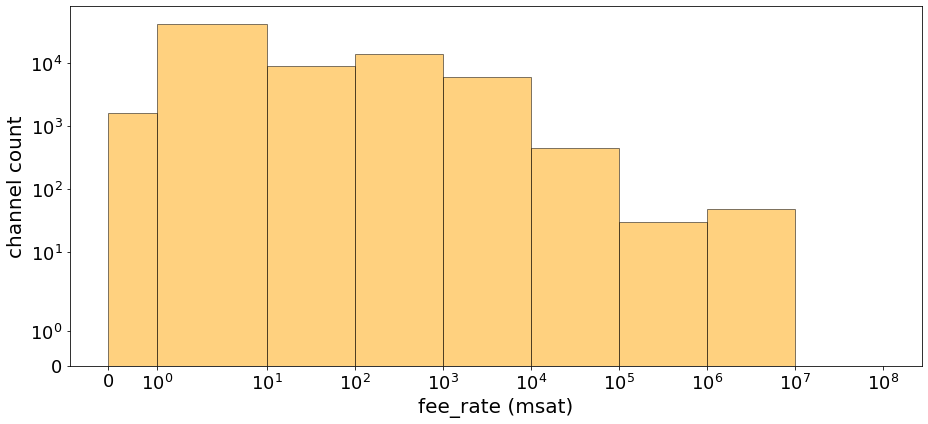

In [17]:
feerate_distribution(feerate)
#plt.savefig('feerate.png')

In [18]:
uno = 0
dieci = 0
cento = 0
mille = 0
diecik = 0
centok = 0
milione = 0
dieciM = 0
miliardo = 0

for key in feeratecounter.keys():
    if int(key) <= 1 :
        uno += feeratecounter[key]
    if int(key) <= 10 :
        dieci += feeratecounter[key]
    if int(key) <= 100 :
        cento += feeratecounter[key]
    if int(key) <= 1000 :
        mille += feeratecounter[key]
    if int(key) <= 10000 :
        diecik += feeratecounter[key]
    if int(key) <= 100000 :
        centok += feeratecounter[key]
    if int(key) <= 1000000 :
        milione += feeratecounter[key]
    if int(key) <= 10000000 :
        dieciM += feeratecounter[key]
    if int(key) <= 1000000000 :
        miliardo += feeratecounter[key]
        
        
print("La percentuale di canali con feerate <= 1 è ", str(round(uno*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 10 è ", str(round(dieci*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 100 è ", str(round(cento*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 1000 è ", str(round(mille*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 10000 è ", str(round(diecik*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 100000 è ", str(round(centok*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 1000000 è ", str(round(milione*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 10000000 è ", str(round(dieciM*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 1000000000 è ", str(round(miliardo*100/len(feerate),3)), "%")

La percentuale di canali con feerate <= 1 è  63.441 %
La percentuale di canali con feerate <= 10 è  68.719 %
La percentuale di canali con feerate <= 100 è  79.275 %
La percentuale di canali con feerate <= 1000 è  96.043 %
La percentuale di canali con feerate <= 10000 è  99.465 %
La percentuale di canali con feerate <= 100000 è  99.881 %
La percentuale di canali con feerate <= 1000000 è  99.95 %
La percentuale di canali con feerate <= 10000000 è  99.962 %
La percentuale di canali con feerate <= 1000000000 è  99.998 %


# ***ROOTS***

In [19]:
root_prop= {} #struttura per memorizzare i nodi radice e le loro proprietà

all_nodes = [node for node in ln.nodes() if ln.degree(node) >=3]

for node in all_nodes:
    
    for n in ln.neighbors(node): #scorro i vicini
        if ln.degree(n) == 1: #se almeno un vicino è una rosa avrò nel dict "root_prop" un campo relativo al nodo node
            root_prop[node] = {'degree': int, 'roses': [], 'blue': [], 'percent_roses': int } 
    
for node in root_prop.keys():
    for n in ln.neighbors(node): 
        if ln.degree(n) == 1:
            root_prop[node]['roses'].append(n) #roses contiene i vicini che sono rose (grado=1)
        else:
            root_prop[node]['blue'].append(n) #blue contiene i vicini che non sono rose (grado >1)
                
    
    root_prop[node]['degree'] = (ln.degree(node))
    #percent_roses rappresenta in percentuale la proporzione di rose a cui il nodo è collegato rispetto ai nodi blue
    root_prop[node]['percent_roses']=(float(len(root_prop[node]['roses']) / ln.degree(node) * 100)) 

In [20]:
print(len(root_prop))

814


In [22]:
#memorizzo la componente principale
largest_component = ln.subgraph(max(nx.connected_components(ln),key=len))
nx.write_gml(largest_component, "output\grafi\largest_component.gml") 
#ln_largest = nx.read_gml("largest_component.gml")

In [27]:
display(largest_component.number_of_edges())
display(largest_component.number_of_nodes())

42865

10867

In [23]:
#applico l'algoritmo di ricerca dei nodi radice solo alla componente principale, mi aspetto che vengano individuati meno nodi 
#rispetto al caso precedente che presumibilmente individuava anche i nodi "nel contorno della rete"

root_prop_largest = {} #struttura per memorizzare i nodi radice e le loro proprietà

nodes = [node for node in largest_component.nodes() if largest_component.degree(node) >=3]

for node in nodes:
    for n in largest_component.neighbors(node): #scorro i vicini
        if largest_component.degree(n) == 1: #se almeno un vicino è una rosa avrò nel dict "root_prop" un campo relativo al nodo node
            root_prop_largest[node] = {'degree': int, 'roses': [], 'blue': [], 'percent_roses': int} 
        

for node in root_prop_largest.keys():
    for n in largest_component.neighbors(node): 
        if largest_component.degree(n) == 1:
            root_prop_largest[node]['roses'].append(n) #roses contiene i vicini che sono rose (grado=1)
        else:
            root_prop_largest[node]['blue'].append(n) #blue contiene i vicini che non sono rose (grado >1)
                
    
    root_prop_largest[node]['degree'] = largest_component.degree(node)
    #percent_roses rappresenta in percentuale la proporzione di rose a cui il nodo è collegato rispetto ai nodi blue
    root_prop_largest[node]['percent_roses'] = float(len(root_prop_largest[node]['roses']) / largest_component.degree(node) * 100)


In [24]:
len(root_prop_largest)

812

In [28]:
#percentuale dei nodi root nella largest_component
perc_roots_largest = int(len(root_prop_largest) / len(root_prop) * 100)
print("Il ", perc_roots_largest, " % dei nodi radice si trova nella componente centrale. ")


#percentuale dei nodi root sul totale:
perc_roots = int(len(root_prop_largest) / largest_component.number_of_nodes() * 100)
print("I nodi root sono il ",perc_roots,"% dei nodi totali")

Il  99  % dei nodi radice si trova nella componente centrale. 
I nodi root sono il  7 % dei nodi totali


### ***Aggiungo attributo 'ISROOT' ai nodi radice per visualizzazione con graphia***

In [30]:
node_attr = {}

for node in largest_component.nodes():
    new = {'ISROOT' : 1 if node in root_prop_largest.keys() else 0}
    node_attr[node] = new
nx.set_node_attributes(largest_component, node_attr)

nx.write_gml(largest_component, "output\grafi\grafo_root.gml") #grafo ottenuto con l'algoritmo precedente ma la condizione affinchè un nodo sia key della struttura è solo che uno dei suoi vicini abbia grado1

In [ ]:
#grafo con condizione sui vicini: grado 1 o grado 2 
#nx.write_gml(largest_component, "grafo_root1295.gml")

In [ ]:
#?
#memorizzo i nodi che sono collegati a più nodi rossi (rose) che blu
selected_nodes = {}

for node in root_prop_largest.keys():
    if(root_prop_largest[node]['percent_roses'] > 40 and largest_component.degree(node) >=4 ):
        selected_nodes[node]= root_prop_largest[node]

In [ ]:
#provo ad individuare altri nodi radice (??)
bouquet_roots = {}

for n in largest_component.nodes():
    #considero come rose nodi di grado 2 
    roses = [nbr for nbr in largest_component.neighbors(n) if largest_component.degree(nbr) == 2]

    if(len(roses) == 2):
        
        bouquet_roots[n] = {'degree' : int, 'roses2': []}

        bouquet_roots[n]['degree'] = (largest_component.degree(n))
        bouquet_roots[n]['roses2'].append(roses[0])
        bouquet_roots[n]['roses2'].append(roses[1])


In [ ]:
roots2 = {}
nodi = []

for n in bouquet_roots.keys():

    roots2[n] = {'neig_0' : [], 'neig_1': []}

    n0 = [nbr for nbr in largest_component.neighbors(bouquet_roots[n]['roses2'][0])]
    n1 = [nbr for nbr in largest_component.neighbors(bouquet_roots[n]['roses2'][1])]

    roots2[n]['neig_0'] = n0
    roots2[n]['neig_1'] = n1

    if( bouquet_roots[n]['roses2'][1] in n0 and n in n0 and bouquet_roots[n]['roses2'][0] in n1 and n in n1):
        nodi.append(n)

In [ ]:
#provo a trovare altri nodi radice:

roots = []
for n in largest_component.nodes(): #per ogni nodo del grafo
    if n not in root_prop_largest.keys(): #se non compare nella struttura dei nodi roots

        neighborgs = [nbr for nbr in largest_component.neighbors(n)] #memorizzo i suoi vicini

        #se tra i vicini del nodo ci sono almeno 3 nodi radice 
        if(len(set(neighborgs) & set(root_prop_largest.keys())) >=5 and largest_component.degree(n) <=5) :
            roots.append(n)


# ***ANALISI CENTRALITA'***



## Trasformo il multigrafo in Grafo, facendo la media delle componenti degli archi

In [178]:
G = nx.Graph()

multi_nodes = []

for edge in ln.edges(data=True,keys=True):

    u = edge[0]
    v = edge[1]

    k = edge[2]

    if not G.has_edge(u,v):

        G.add_edge(u,v)
        
        htlc1 = mean(d.get('MINHTLC1',-1) for d in ln.get_edge_data(u,v).values())
        htlc2 = mean(d.get('MINHTLC2',-1) for d in ln.get_edge_data(u,v).values())
        feebase1 = mean(d.get('FEEBASE1',-1) for d in ln.get_edge_data(u,v).values())
        feebase2 = mean(d.get('FEEBASE2',-1) for d in ln.get_edge_data(u,v).values())
        feerate1 = mean(d.get('FEERATE1',-1) for d in ln.get_edge_data(u,v).values())
        feerate2 = mean(int(d.get('FEERATE2',-1)) for d in ln.get_edge_data(u,v).values())

        G[u][v]['ID'] = k
        G[u][v]['HTLC1'] = htlc1
        G[u][v]['HTLC2'] = htlc2
        G[u][v]['FEEBASE1'] = feebase1
        G[u][v]['FEEBASE2'] = feebase2
        G[u][v]['FEERATE1'] = feerate1
        G[u][v]['FEERATE2'] = feerate2


In [7]:
betw = nx.betweenness_centrality(G, seed=0)
print("Betweenness - FATTO")

Betweenness - FATTO


In [10]:
#salva in file
np.save('filebetweenness.npy',betw) 

#leggi in dict
new_dict = np.load('filebetweenness.npy', allow_pickle='TRUE')


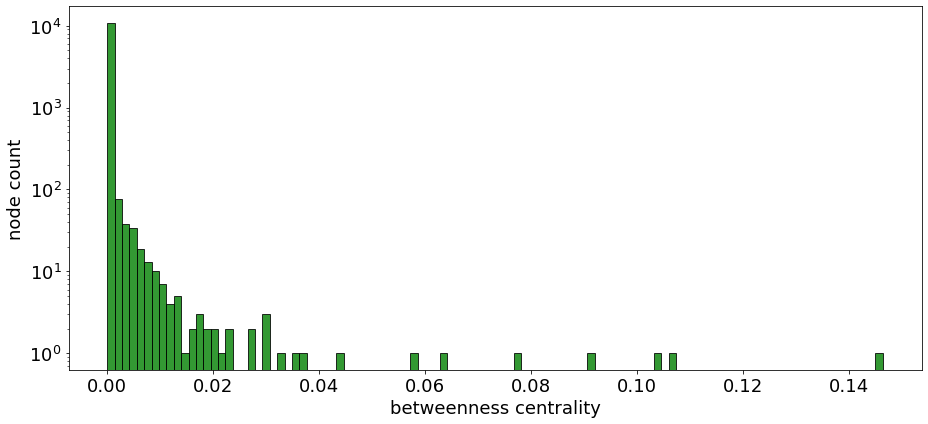

In [12]:
#istogramma distribuzione dei valori di betweenness tra i nodi
plt.figure(figsize=(13,6))
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

plt.xlabel('betweenness centrality', fontsize=18)
    
n = len(betw)
bins = int(n**(1/float(2))) 

plt.ylabel('node count', fontsize=18)
plt.yscale('log')
plt.hist(betw.values(), bins = bins, edgecolor='black', alpha = 0.8, color='green')
plt.tight_layout()
plt.savefig("betweenness.png")

In [101]:
#seleziono le chiavi dei nodi che hanno valori di betweenness più alti
selected_nodes = [ key for key, value in betw.items() if value >= 0.04]
selected_nodes2 = [ (key,value) for key, value in betw.items() if value >= 0.04]

display(selected_nodes2)

[('0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266',
  0.10415522356707307),
 ('0331f80652fb840239df8dc99205792bba2e559a05469915804c08420230e23c7c',
  0.058151323766783544),
 ('03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f',
  0.14645591663493682),
 ('02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b',
  0.10649142938008296),
 ('0242a4ae0c5bef18048fbecf995094b74bfb0f7391418d71ed394784373f41e4f3',
  0.07803361142287178),
 ('02315fe3619ffdea2561bcacecada87b226723f471a59fdbfec18c4e84bcf785b2',
  0.06367093626659243),
 ('03abf6f44c355dec0d5aa155bdbdd6e0c8fefe318eff402de65c6eb2e1be55dc3e',
  0.044260411995861546),
 ('023d70f2f76d283c6c4e58109ee3a2816eb9d8feb40b23d62469060a2b2867b77f',
  0.09083421743132852)]

In [31]:
#memorizzo 
dict_selected_nodes = {'node': [], 'edge_id': [],  'htlc': [], 'feebase' : [], 'feerate' : [], 'routing': []}

for edges in G.edges(data=True):

    for n in selected_nodes:


        u = edges[0]
        v = edges[1]

        if n == u :
            #dict_selected_nodes[n] = { 'edge_id': [],  'htlc': [], 'feebase' : [], 'feerate' : []}

            dict_selected_nodes['node'].append(u)
            
            dict_selected_nodes['edge_id'].append(G[u][v]['ID']) 
            dict_selected_nodes['htlc'].append(G[u][v]['HTLC1']) 
            dict_selected_nodes['feebase'].append(G[u][v]['FEEBASE1'])
            dict_selected_nodes['feerate'].append(G[u][v]['FEERATE1'])
            dict_selected_nodes['routing'].append(G[u][v]['ROUTING1'])

            
        elif n == v :
            #dict_selected_nodes[n] = { 'edge_id': [],  'htlc': [], 'feebase' : [], 'feerate' : []}
            dict_selected_nodes['node'].append(v)

            dict_selected_nodes['edge_id'].append(G[u][v]['ID']) 
            dict_selected_nodes['htlc'].append(G[u][v]['HTLC2']) 
            dict_selected_nodes['feebase'].append(G[u][v]['FEEBASE2'])
            dict_selected_nodes['routing'].append(G[u][v]['ROUTING2'])



NameError: name 'G' is not defined

In [180]:
#quante volte il nodo compare nel dizionario (equivale al grado)
counter = sorted(collections.Counter(dict_selected_nodes['node']))
display(counter)

['0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266',
 '02315fe3619ffdea2561bcacecada87b226723f471a59fdbfec18c4e84bcf785b2',
 '023d70f2f76d283c6c4e58109ee3a2816eb9d8feb40b23d62469060a2b2867b77f',
 '0242a4ae0c5bef18048fbecf995094b74bfb0f7391418d71ed394784373f41e4f3',
 '02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b',
 '0331f80652fb840239df8dc99205792bba2e559a05469915804c08420230e23c7c',
 '03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f',
 '03abf6f44c355dec0d5aa155bdbdd6e0c8fefe318eff402de65c6eb2e1be55dc3e']

In [181]:
df = pd.DataFrame(data=dict_selected_nodes)
display(df)

,node,edge_id,htlc,feebase,feerate
0,0217890e3aad8d35bc054f43acc00084b25229ecff0ab6...,613585762504409089,1000.0,1000.0,1.0
1,0242a4ae0c5bef18048fbecf995094b74bfb0f7391418d...,582283765936160768,1000.0,1000.0,1.0
2,0217890e3aad8d35bc054f43acc00084b25229ecff0ab6...,620040995220881408,0.0,1000.0,1.0
3,0217890e3aad8d35bc054f43acc00084b25229ecff0ab6...,610203664718299137,0.0,1000.0,1.0
4,0217890e3aad8d35bc054f43acc00084b25229ecff0ab6...,625179013110693889,0.0,1000.0,1.0
...,...,...,...,...,...
7725,023d70f2f76d283c6c4e58109ee3a2816eb9d8feb40b23...,748334210946826241,1000.0,0.0,1.0
7726,023d70f2f76d283c6c4e58109ee3a2816eb9d8feb40b23...,748334210946957313,1000.0,1000.0,1.0
7727,023d70f2f76d283c6c4e58109ee3a2816eb9d8feb40b23...,748368295823933441,1000.0,0.0,1.0
7728,023d70f2f76d283c6c4e58109ee3a2816eb9d8feb40b23...,748368295886782464,1000.0,0.0,1.0


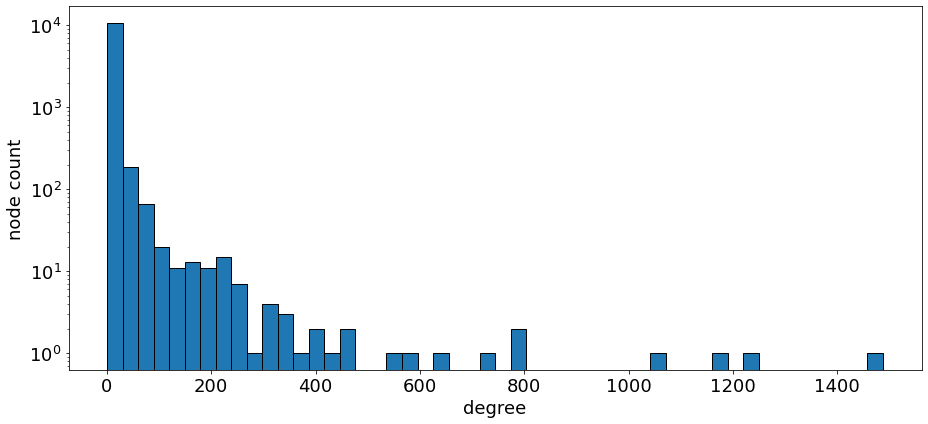

In [116]:
    #istogramma: distribuzione del grado dei nodi
    #gradi dei nodi della LN passata come argomento
    degrees = [G.degree(node) for node in G.nodes()]

    n = len(degrees)
    bins=50
    
    plt.figure(figsize=(13,6))
    plt.tick_params(axis='x', labelsize=18)
    plt.tick_params(axis='y', labelsize=18)
    plt.xlabel('degree', fontsize=18)
    plt.ylabel('node count',fontsize=18)
    plt.yscale('log')
    plt.hist(degrees, bins = bins, edgecolor = 'black')
    plt.tight_layout()
    plt.savefig("degrees.png")

In [56]:
for n in counter:
    display(n)

'0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266'

'02315fe3619ffdea2561bcacecada87b226723f471a59fdbfec18c4e84bcf785b2'

'023d70f2f76d283c6c4e58109ee3a2816eb9d8feb40b23d62469060a2b2867b77f'

'0242a4ae0c5bef18048fbecf995094b74bfb0f7391418d71ed394784373f41e4f3'

'02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b'

'0331f80652fb840239df8dc99205792bba2e559a05469915804c08420230e23c7c'

'03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f'

'03abf6f44c355dec0d5aa155bdbdd6e0c8fefe318eff402de65c6eb2e1be55dc3e'

In [182]:
dict_valori_fees = {}

for n in counter:
    
    dict_valori_fees[n] = {'HTLC':[],'FEEBASE':[],'FEERATE':[]}

    for i in range(len(df)):
     #nodi selezionati

        if df.loc[i,'node'] == n :

            dict_valori_fees[n]['HTLC'].append(df.loc[i,'htlc'])
            dict_valori_fees[n]['FEEBASE'].append(df.loc[i,'feebase'])
            dict_valori_fees[n]['FEERATE'].append(df.loc[i,'feerate'])



In [183]:
df_values = pd.DataFrame(data=dict_valori_fees)
display(df_values)

,0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266,02315fe3619ffdea2561bcacecada87b226723f471a59fdbfec18c4e84bcf785b2,023d70f2f76d283c6c4e58109ee3a2816eb9d8feb40b23d62469060a2b2867b77f,0242a4ae0c5bef18048fbecf995094b74bfb0f7391418d71ed394784373f41e4f3,02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b,0331f80652fb840239df8dc99205792bba2e559a05469915804c08420230e23c7c,03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f,03abf6f44c355dec0d5aa155bdbdd6e0c8fefe318eff402de65c6eb2e1be55dc3e
HTLC,"[1000.0, 0.0, 0.0, 0.0, 0.0, 1000.0, 1000.0, 1...","[1000.0, 1.0, 1000.0, 1000.0, 1000.0, 1000.0, ...","[1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000....","[1000.0, 1000.0, 1000.0, 1000.0, 1000.0, -1.0,...","[10000.0, 10000.0, 10000.0, 1.0, 10000.0, 1000...","[0.0, 0.0, 1000.0, 0.0, 0.0, 1000.0, 1000.0, 1...","[1000.0, 1.0, 0.0, 0.0, -1.0, -1.0, 0.0, 0.0, ...","[1000.0, 1000.0, -1.0, 1.0, 500.5, 1.0, 1000.0..."
FEEBASE,"[1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000....","[0.0, 1000.0, 1000.0, 50.0, 0.0, 1000.0, 5000....","[1.0, 1000.0, 0.0, 1000.0, 900.0, 92.0, 1000.0...","[1000.0, 1000.0, 1000.0, 1000.0, 1.0, -1.0, -1...","[1.0, 1.0, 1.0, 1000.0, 1.0, 1000.0, 1.0, 1000...","[0.0, 0.0, 1000.0, 0.0, 0.0, 0.0, 1000.0, 0.0,...","[1000.0, 1000.0, 1000.0, 1000.0, -1.0, -1.0, 0...","[1000.0, 1000.0, -1.0, 1000.0, 1000.0, 1000.0,..."
FEERATE,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[11235.0, 10.0, 1.0, 2500.0, 450.0, 1.0, 504.0...","[48.0, 1.0, 11235.0, 5.0, 100.0, 187.0, 100.0,...","[1.0, 10.0, 1.0, 500.0, 48.0, -1.0, -1.0, -1.0...","[1000.0, 1000.0, 1000.0, 10.0, 1000.0, 1.0, 10...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1000.0, 1.0, 1....","[500.0, 500.0, 100.0, 100.0, -1.0, -1.0, 0.0, ...","[1700.0, 1700.0, -1.0, 1700.0, 850.5, 1700.0, ..."


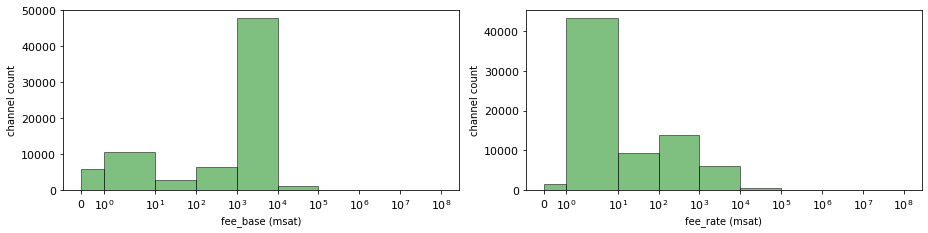

In [115]:
plt.figure(figsize=(13,6))
a1 = plt.subplot(2,2,1)
a1.tick_params(axis='x', labelsize=11)
a1.tick_params(axis='y', labelsize=11)
plt.xlabel('fee_base (msat)', fontsize=10)
plt.ylabel('channel count',fontsize=10)
#plt.yscale('log')
plt.xscale('symlog')
a1.hist(feebase, bins = [0,1,10,100,1000,10000,100000,1000000,10000000,100000000], alpha = 0.5, edgecolor ='black', color = 'green')
plt.tight_layout()


a2=plt.subplot(2, 2, 2)
a2.tick_params(axis='x', labelsize=11)
a2.tick_params(axis='y', labelsize=11)
plt.xlabel('fee_rate (msat)', fontsize=10)
plt.ylabel('channel count',fontsize=10)
#plt.yscale('log')
plt.xscale('symlog')
a2.hist(feerate, bins = [0,1,10,100,1000,10000,100000,1000000,10000000,100000000], alpha = 0.5, edgecolor ='black', color = 'green')
plt.tight_layout()

plt.savefig("fees_all.png")



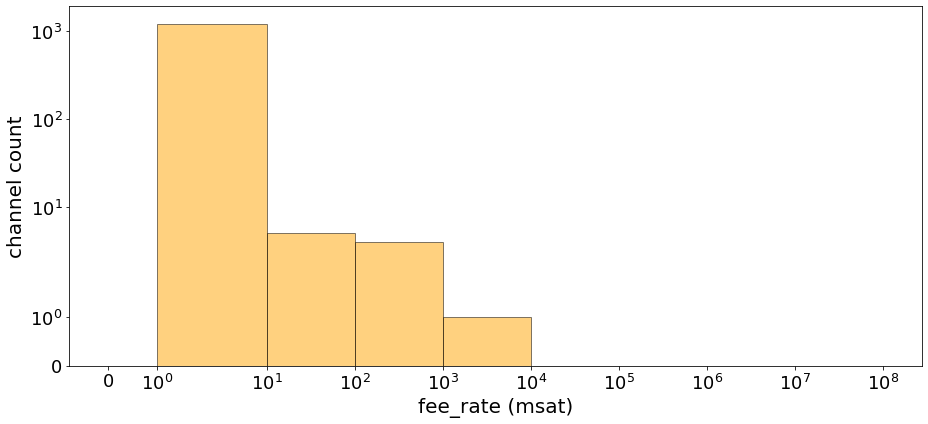

In [79]:
feerate_distribution(df_values['0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266'][2])

# ***ANALISI CAMPO ROUTING***


### ***def*** : se ROUTING = 1 il nodo consente il routing, se = -1 il routing non è consentito

In [5]:
#canali su cui non avvengono inoltri su in nessuna delle due direzioni
channels_two_not = [d['CHANNELID'] for u,v,d in ln.edges.data() if d['ROUTING1'] == 0 and d['ROUTING2'] == 0]
#canali su cui avvengono inoltri su in una direzione
channels_one_not = [d['CHANNELID'] for u,v,d in ln.edges.data() if d['ROUTING1'] == 0 or d['ROUTING2'] == 0]

display(len(channels_two_not))
display(len(channels_one_not))


1524

12043

In [13]:
#creo il sottografo solo con i canali su cui vengono inoltrati i pagamenti 

#subgraph = nx.Multigraph(data=True)

nodes = []

for u,v,d in ln.edges(data=True):
    if d['CHANNELID'] not in channels_two_not:
        nodes.append(u)
        nodes.append(v)

subgraph = ln.subgraph(nodes).copy()




In [14]:
display(subgraph.number_of_edges())
display(subgraph.number_of_nodes())

42736

10870